In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import json
sns.set_context('notebook', font_scale=1.5)
sns.set_style('white')

In [2]:
EXPERIMENT = 'webofcash-pilot-1.1'
with open(f'model/results/{EXPERIMENT}/recovery.json') as f:
    results = json.load(f)
    
models = results['models']

In [55]:
def plot_mat(X, **kws):
    X = np.array(X).T
    ax = sns.heatmap(X, xticklabels=models, yticklabels=models, annot=True, cbar=False, **kws)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top') 
    plt.xlabel("True Model")
    plt.ylabel("Fitting Model")
    
def savefig(name):
    plt.savefig(f'figs/{name}.png', bbox_inches='tight', dpi=200)

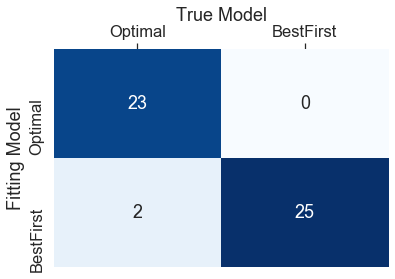

In [58]:
plot_mat(results['CM'], cmap='Blues')
# plt.title('Confusion Matrix', size=24)
savefig('confusion')

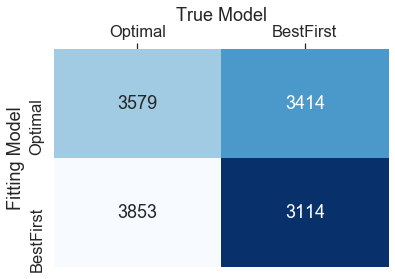

In [59]:
plot_mat(np.array(results['total_likelihood']).round().astype(int), fmt="d", cmap='Blues_r')
# plt.title('Negative Log Likelihood', size=24)
savefig('total_likelihood')